In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
#from pymc3 import *

# Introduction to regression with multiple predictors

## Example 1 (simulating and fitting multiple predictor regression)



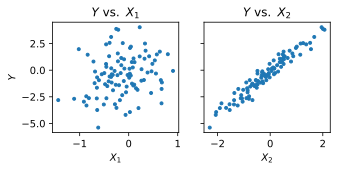

In [ ]:
# generate values for predictor variables
n = 100
x1 = np.random.normal(0,.5,n)
x2 = np.random.normal(0,1,n)

# set parameter values
b1 = 1 # beta1
b2 = 2 # beta2
b0 = 0 # beta0
sigma = 0.1

# generate noise
y = np.random.normal(b0 + b1*x1+b2*x2,sigma)

# plot
fig,axs = plt.subplots(figsize=(5,2),ncols=2,sharey=True)

ax = axs[0]
ax.set_title("$Y\,\, {\\rm vs.} \,\,X_1$")
ax.plot(x1,y,".")
#ax.plot(x1,a1*x1)
ax.set_ylabel("$Y$")
ax.set_xlabel("$X_1$")

ax = axs[1]
ax.set_title("$Y\,\, {\\rm vs.} \,\,X_2$")
ax.plot(x2,y,".")
#ax.plot(x2,a2*x2)
ax.set_xlabel("$X_2$");

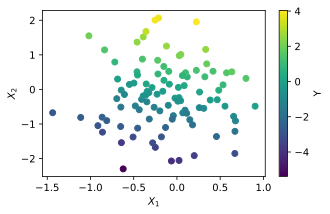

In [ ]:
# another way to plot the data is using colorbar
fig,ax = plt.subplots(figsize=(5,3))

sc = ax.scatter(x1, x2, c=y, cmap='viridis')  # 'viridis' is a colormap for color mapping

# Add labels and a colorbar
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
fig.colorbar(sc,label="Y")


## Fitting the model

 Statsmodels wants us to input a multidimensional arrray
\begin{equation}
X = \left[\begin{array}{ccc}
1 &X_{1,1}& X_{1,2}\\
1 &X_{2,1}& X_{2,2}\\
\vdots & \vdots & \vdots\\
1 &X_{n,1}& X_{n,2}\\
\end{array} \right]
\end{equation}

The $i$th column contains the predictors that go with our $i$th observation $y$. We also include a column of ones, which correspond to a predictor $x_0$ that is one for every observation. This will tell statsmodels to also include a constant term (the intercept) $\beta_0$ in our regression.

The following code will get our data in this format:

In [ ]:
np.transpose(np.array([x1,x2]))

X = sm.add_constant(np.transpose(np.array([x1,x2])))

In [ ]:


X = sm.add_constant(np.transpose(np.array([x1,x2])))

# perform the regression
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.481e+04
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.65e-121
Time:                        15:28:36   Log-Likelihood:                 74.804
No. Observations:                 100   AIC:                            -143.6
Df Residuals:                      97   BIC:                            -135.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0053      0.012     -0.448      0.6

In [ ]:
1-0.1**2/np.var(y)

0.9975106578662745

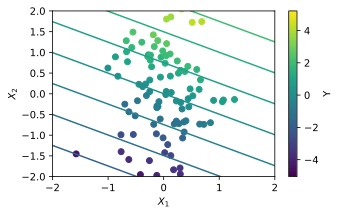

In [ ]:
# another way to plot the data is using colorbar
fig,ax = plt.subplots(figsize=(5,3))

sc = ax.scatter(x1, x2, c=y, cmap='viridis')  # 'viridis' is a colormap for color mapping



# this adds a contour plot
x1_range = np.linspace(-3,3,100)
x2_range = np.linspace(-4,4,100)

# Create a meshgrid from x1 and x2
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

betas = results.params
y_pred = results.params[0] + x1_grid*results.params[1] + x2_grid*results.params[2]

# Create a contour plot
contour_plot = plt.contour(x1_grid, x2_grid, y_pred, levels=20, cmap='viridis')


# Add labels and a colorbar
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
fig.colorbar(sc,label="Y")


## Example 2 (test scores)



In [ ]:
sm.add_constant(df[["mom_hs","mom_iq"]])

,const,mom_hs,mom_iq
0,1.0,1,121.117529
1,1.0,1,89.361882
2,1.0,1,115.443165
3,1.0,1,99.449639
4,1.0,1,92.745710
...,...,...,...
429,1.0,0,84.877412
430,1.0,1,92.990392
431,1.0,0,94.859708
432,1.0,1,96.856624


In [ ]:
# let try working with some real data
df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/KidIQ/data/kidiq.csv")
y = df.kid_score.values
x_hs = df.mom_hs.values
x_iq = df.mom_iq.values


X = sm.add_constant(df[["mom_hs","mom_iq"]])

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.79e-23
Time:                        15:41:49   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7315      5.875      4.380      0.0

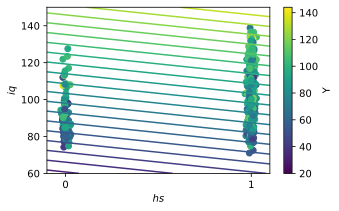

In [ ]:
# another way to plot the data is using colorbar
fig,ax = plt.subplots(figsize=(5,3))

sc = ax.scatter(x_hs + np.random.normal(0,0.01,len(x_hs)), x_iq, c=y, cmap='viridis')  # 'viridis' is a colormap for color mapping

# this adds a contour plot
x1_range = np.linspace(-0.5,1.5,100)
x2_range = np.linspace(60,150,100)

# Create a meshgrid from x1 and x2
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

betas = results.params
y_pred = results.params[0] + x1_grid*results.params[1] + x2_grid*results.params[2]

# Create a contour plot
contour_plot = plt.contour(x1_grid, x2_grid, y_pred, levels=20, cmap='viridis')



# Add labels and a colorbar
ax.set_xlabel("$hs$")
ax.set_ylabel("$iq$")
ax.set_xticks([0,1])
ax.set_xlim([-0.1,1.1])
fig.colorbar(sc,label="Y")

In [ ]:
np.std(x_hs)

0.41032590332414487

In [ ]:
results.params[1]*np.std(x_hs)

2.44148709750909

In [ ]:
results.params[2]*np.std(x_iq)

8.448840207947194

In [ ]:
beta0_fit,beta1_fit,beta2_fit = results.params
sigma_fit = np.sqrt(results.mse_resid) # estimate of variance
sigma_fit

count = 0
n_samps = 50000
for k in range(n_samps):
    # simulate student's scores
    y1 = np.random.normal(beta0_fit + 0*beta1_fit + 90*beta2_fit,sigma_fit) # first student
    y2 = np.random.normal(beta0_fit + 1*beta1_fit + 110*beta2_fit,sigma_fit) # second student
    if y1>y2:
      count = count + 1
count/n_samps

0.2505

# Interpretation of regression coefficients

## Example 3 (single vs. two predictors in test score model)

In [ ]:
iq_hs = x_iq[x_hs ==1]
iq_nohs = x_iq[x_hs ==0]
np.mean(iq_hs)-np.mean(iq_nohs)

10.322897022768998

## Example 4 (Normal predictors with correlations)

In [ ]:
N = 1000000 # number of data points collected for each sample
b = -0.3
beta1 = 1
beta2 = 2
# generate x points
x1 = np.random.normal(0,1,N)
x2 = b*x1 + np.random.normal(0,np.sqrt(1-b**2),N)

# generate y points (our sample)
y = beta1*x1+beta2*x2 + np.random.normal(0,0.3,len(x1))

In [ ]:
np.var(x2)

1.0017543706759704

In [ ]:
model = sm.OLS(y,sm.add_constant(np.transpose(np.array([x1,x2]))))
results = model.fit()
results.params

array([3.46561832e-04, 1.00003525e+00, 2.00010597e+00])

In [ ]:
(np.cov(x1,y)[0,1]-np.cov(x2,y)[0,1]*b)/(1-b**2)

0.9998055354582351

# Sample distribution


## Example 5 (joint sample distribution of regression coefficients)



In [ ]:
def sample_dist(beta1,beta2,b):
  n_samples = 200 # number of samples to generate
  N = 100 # number of data points collected for each sample
  P = np.zeros((n_samples,2)) # save the values from sampes distribution

  # generate x points
  x1 = np.random.normal(0,1,N)
  x2 = b*x1 + np.random.normal(0,np.sqrt(1-b**2),N)
  X = np.transpose(np.array([x1,x2]))

  for k in range(n_samples):
    # generate y points (our sample)
    y = beta1*x1+beta2*x2 + np.random.normal(0,0.3,len(x1))

    # fit model and save (a_fit,b_fit)
    model = sm.OLS(y,X)
    results = model.fit()
    P[k,:] = results.params
  return pd.DataFrame(P,columns = ["beta1","beta2"])

In [ ]:
df = sample_dist_ab(1,2,0.)

Text(0, 0.5, '$\\beta_2$')

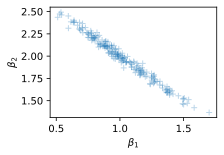

In [ ]:
P = sample_dist_ab(1,2,0.99)
fig,ax = plt.subplots(figsize=(3,2))
ax.plot(P.beta1,P.beta2,"+",alpha=0.3)
#ax.set_xlim([0,1])
#ax.set_ylim([0,1])
ax.set_xlabel("$\\beta_1$")
ax.set_ylabel("$\\beta_2$")

In [ ]:
# c is what I called b above!
beta1 = -6
beta2 = 1
c_range = np.linspace(-0.9,0.9,20)
cv = np.zeros(len(c_range))
for k in range(len(c_range)):
  df = sample_dist(beta1,beta2,c_range[k])

  # standardize
  z1 = (df.beta1.values - np.mean(df.beta1.values))/np.std(df.beta1.values)
  z2 = (df.beta2.values - np.mean(df.beta2.values))/np.std(df.beta2.values)

  # compute the correlation coefficient (which is covariance for standardized variables)
  cv[k] = np.cov(z1,z2)[1,0]

Text(0, 0.5, '$\\rho$ between a1 and a2')

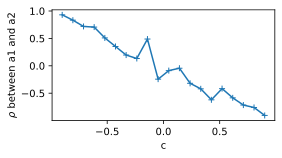

In [ ]:
# now we plot the correrelation coefficient as a function of $c$
fig, ax = plt.subplots(figsize=(4,2))
ax.plot(c_range,cv,"+-")
ax.set_xlabel("c")
ax.set_ylabel(r"$\rho$ between a1 and a2")

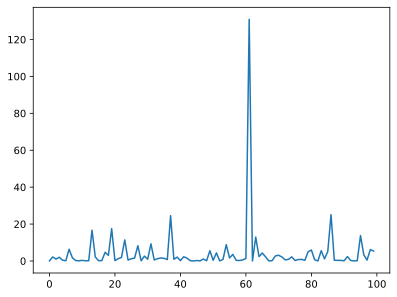

In [ ]:
x = np.random.pareto(1,100)
plt.plot(x)

# Working with catagorical predictors and large numbers of predictors

## Example 6 (earnings data)


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")
data = data.dropna() # this line of code drops any rows that are "nan", which means they are missing data.
data

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91
5,68,165.0,0,62000.0,62.0,Black,18.0,18.0,18.0,1,1,2.0,2.0,2.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,61,120.0,0,15000.0,15.0,White,18.0,18.0,18.0,6,1,2.0,0.0,0.0,82
1812,64,130.0,0,8000.0,8.0,White,12.0,12.0,12.0,1,1,1.0,7.0,7.0,33
1813,72,194.0,1,60000.0,60.0,White,12.0,12.0,12.0,2,1,2.0,0.0,0.0,50
1814,63,155.0,0,15000.0,15.0,Other,14.0,14.0,14.0,6,1,2.0,2.0,2.0,69


In [ ]:
# we will start with a model using ONLY race/ethnicity
data_x = data[["ethnicity"]]
np.unique(data_x.values)

array(['Black', 'Hispanic', 'Other', 'White'], dtype=object)


Now we need to make the numpy arrays of these new predictor variables. The pandas library has a function for this called `get_dummies`. This will take a specified predictor make an indictor column for each value. If you give it the argument `drop_first=True`, then it will remove the first of these (thus making that value the baseline factor).

In [ ]:
data_x_new = pd.get_dummies(data_x,drop_first=True)
data_x_new

,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,0,0,1
1,0,0,1
2,0,0,1
4,0,1,0
5,0,0,0
...,...,...,...
1811,0,0,1
1812,0,0,1
1813,0,0,1
1814,0,1,0


In [ ]:
x = data_x_new.to_numpy() # convert to numpy array for statsmodels
x

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
print(data_x_new)
X = sm.add_constant(data_x_new) # add a column of all 1s


      ethnicity_Hispanic  ethnicity_Other  ethnicity_White
0                      0                0                1
1                      0                0                1
2                      0                0                1
4                      0                1                0
5                      0                0                0
...                  ...              ...              ...
1811                   0                0                1
1812                   0                0                1
1813                   0                0                1
1814                   0                1                0
1815                   0                0                1

[1440 rows x 3 columns]


In [ ]:
y = data.earnk.values
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.828
Date:                Thu, 12 Oct 2023   Prob (F-statistic):             0.0373
Time:                        13:26:20   Log-Likelihood:                -6606.7
No. Observations:                1440   AIC:                         1.322e+04
Df Residuals:                    1436   BIC:                         1.324e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.1717      2

## Example 6.1 (earnings data with more predictors)

Consider the problem of building a model for earnings as a function of ethnicity, gender and age. That is:
\begin{equation}
y = a_0 + \beta_{\rm male}x_{\rm male} + \beta_{\rm age}x_{\rm age} + \beta_{\rm black} x_{\rm black} + \beta_{\rm white}x_{\rm white} + a_{\rm hispanic} x_{\rm hispanic} + \beta_{\rm other}x_{\rm other} + \epsilon
\end{equation}
(when working with many variables we will use the names as subscripts)
**This is a BAD model, but let's take it at face value for now**

In [ ]:
data_x = data[["male","age","ethnicity"]]

In [ ]:
# Let's get just the columns we want
data_x = data[["male","age","ethnicity"]] # this makes a dataframe with just the columns listed in [[]]
xeth = data_x.ethnicity.values
xeth

NameError: ignored

## Dealing with many predictors when making predictions

WHen working with many different predictors, it can be annoying to assign variables to all the fitted coefficients sperately. For this reason, we often save them all as a numpy array

In [ ]:
beta_fits = results.params
sigma_fit = np.sqrt(results.mse_resid)

In [ ]:
beta_fits

array([ 4.69810663, 15.82050585,  0.20950771, -1.78645889,  4.48798365,
        3.73823925])

In [ ]:
x_pred = np.array([1,1,50,0,0,1]) # the first value is out x_0, the constant term
np.sum(beta_fits*x_pred)

34.732237239068496